Code Shaivi: Qualitatively Tracking Penumbral Filaments with Continuum intensity, Magnetic Inclination, Bz, and Doppler Intensity.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt   
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg

In [3]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

In [9]:
#consider creating variables with the numbers and bounds of min and max because you may want to change these values for successive images.
#long term goal: you will pass differnet files through them, so make the path's variables.

plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[50:275,:,0], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[50:275,:,0], cmap='gray', vmin=-500, vmax=500)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

In [ ]:
img = cv2.imread('initial.png',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
plt.rcParams.update({'axes.grid':False})
sel_alltog = tvg.show(alltogether[:,:,:], pdim=3, cmap='gray', interpolation='None')


[]


In [ ]:
[50:200,15:,:]

In [9]:
print(sel_alltog['ori_coord_values'])
print(data_conti.shape)

[[70, 82, 29, 149.51524353027344], [93, 47, 29, 156.58787536621094], [73, 48, 29, 169.06045532226562], [58, 38, 29, 136.76821899414062]]
(384, 120, 59)


In [10]:
##to concatenate writing positions into lists with values across all parameters.

orival = sel_alltog['ori_coord_values']
allval = np.zeros([3, len(orival)])
for oj, o in enumerate(orival):
    print(data_conti[o[0],o[1],o[2]])
    print(data_magincl[o[0],o[1],o[2]])
    print(data_Bz[o[0],o[1],o[2]])
    #print(data_dopp[o[0],o[1],o[2]])
    allval[:, oj] = [data_conti[o[0],o[1],o[2]],
                     data_magincl[o[0],o[1],o[2]],
                     data_Bz[o[0],o[1],o[2]]]
#data_dopp[o[0],o[1],o[2]]

173.50726318359375
135.70086669921875
144.1608123779297
128.5829620361328
150.63983154296875
126.69957733154297
174.8943328857422
154.42674255371094
131.85096740722656
173.98570251464844
143.12222290039062
139.90679931640625


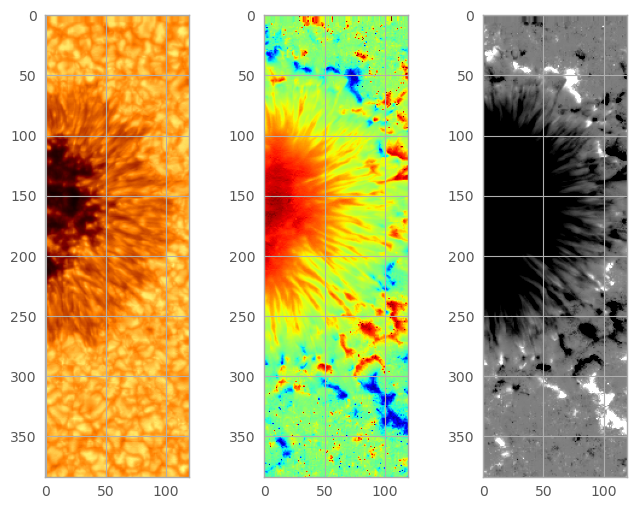

In [ ]:
plt.ion()
num_scans = 58
fig, ax = plt.subplots(1,3)
for i in range(num_scans):
    ax[0].imshow(data_conti[:,:,i], cmap='afmhot', vmin=3e3, vmax=20e3)
    ax[1].imshow(data_magincl[:,:,i], cmap='jet',  vmin=0, vmax=180)
    ax[2].imshow(data_Bz[:,:,i], cmap='gray', vmin=-500, vmax=500)
    plt.pause(1)
plt.show()